In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

df = pd.read_csv('./hindi_hatespeech.tsv', sep='\t')
df.head()

,text_id,text,task_1,task_2,task_3
0,hasoc_hi_5556,"बांग्लादेश की शानदार वापसी, भारत को 314 रन पर ...",NOT,NONE,NONE
1,hasoc_hi_5648,सब रंडी नाच देखने मे व्यस्त जैसे ही कोई #शांती...,HOF,PRFN,UNT
2,hasoc_hi_164,तुम जैसे हरामियों के लिए बस जूतों की कमी है शु...,HOF,PRFN,TIN
3,hasoc_hi_3530,"बीजेपी MLA आकाश विजयवर्गीय जेल से रिहा, जमानत ...",NOT,NONE,NONE
4,hasoc_hi_5206,चमकी बुखार: विधानसभा परिसर में आरजेडी का प्रदर...,NOT,NONE,NONE


In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

In [ ]:
positive = pd.DataFrame({'text_id':[], 'text':[], ' task_1':[]})
negative = pd.DataFrame({'text_id':[], 'text':[], ' task_1':[]})

print(len(df))

for row in range(0, len(df)):
  if df.loc[[row], 'task_1'].item() == 'HOF':
    negative = negative.append({'text_id':df.loc[[row], 'text_id'].item(), 'text': df.loc[[row], 'text'].item(), 'task_1': df.loc[[row], 'task_1'].item()}, ignore_index=True)
  else:
    positive = positive.append({'text_id':df.loc[[row], 'text_id'].item(), 'text': df.loc[[row], 'text'].item(), 'task_1': df.loc[[row], 'task_1'].item()}, ignore_index=True)



4665


In [ ]:
print(negative.head())
print(len(negative))
print(positive.head())
print(len(positive))
print(len(positive)/len(df))

         text_id  ... task_1
0  hasoc_hi_5648  ...    HOF
1   hasoc_hi_164  ...    HOF
2  hasoc_hi_6865  ...    HOF
3  hasoc_hi_3763  ...    HOF
4  hasoc_hi_5898  ...    HOF

[5 rows x 4 columns]
2469
         text_id  ... task_1
0  hasoc_hi_5556  ...    NOT
1  hasoc_hi_3530  ...    NOT
2  hasoc_hi_5206  ...    NOT
3  hasoc_hi_5121  ...    NOT
4  hasoc_hi_7142  ...    NOT

[5 rows x 4 columns]
2196
0.4707395498392283


In [ ]:
matcher = Matcher(nlp.vocab)
matcher.add('HASHTAG', None, [{'TEXT': '#'}, {'IS_ASCII': True}])

def tags_extract(dataset):
  tags = []
  flags = []
  dataset = dataset
  for i in range(0, len(dataset)):
    doc = nlp(dataset['text'][i])
    matches = matcher(doc)

    for id, start, end in matches:
      span = doc[start:end]
      tags.append(span.text)
      flags.append(dataset['task_1'][i])
  return pd.DataFrame({'tags': tags, 'flag': flags})

pos_tags = tags_extract(positive)
neg_tags = tags_extract(negative)
tags= tags_extract(df)

In [ ]:
tags['flag'].unique()

array(['NOT', 'HOF'], dtype=object)

In [ ]:
len(tags)

1364

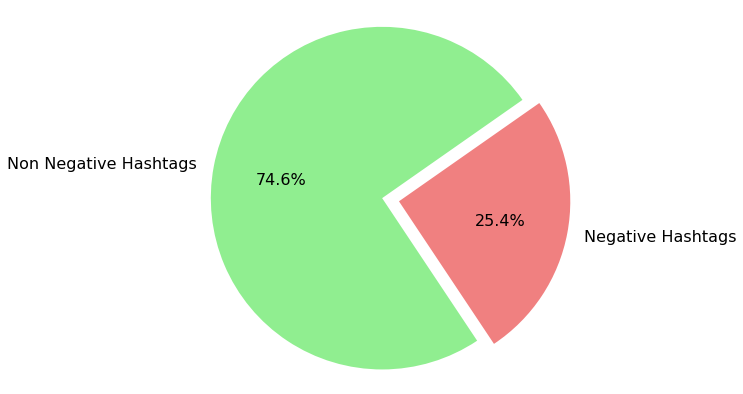

In [ ]:
# data to plot
plt.rcParams.update({'font.size':16})
labels= [ 'Non Negative Hashtags', 'Negative Hashtags',]
values = [len(pos_tags), len(neg_tags)]
colors = ['lightgreen', 'lightcoral']

# explode 1st slice
explode = (0, 0.1)

fig, axs = plt.subplots(figsize=(11, 7))
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=35)

plt.axis('equal')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
tags

,tags,flag
0,#INDvBAN,NOT
1,#CWC19,NOT
2,#AkashVijayvargiya,NOT
3,#biharencephalitisdeaths,NOT
4,#shahrukhsiddiqui,NOT
...,...,...
1359,#Modi,NOT
1360,#G20,NOT
1361,#Lynchistaan,HOF
1362,#India,HOF


In [ ]:
text = ''.join(neg_tags['tags'])

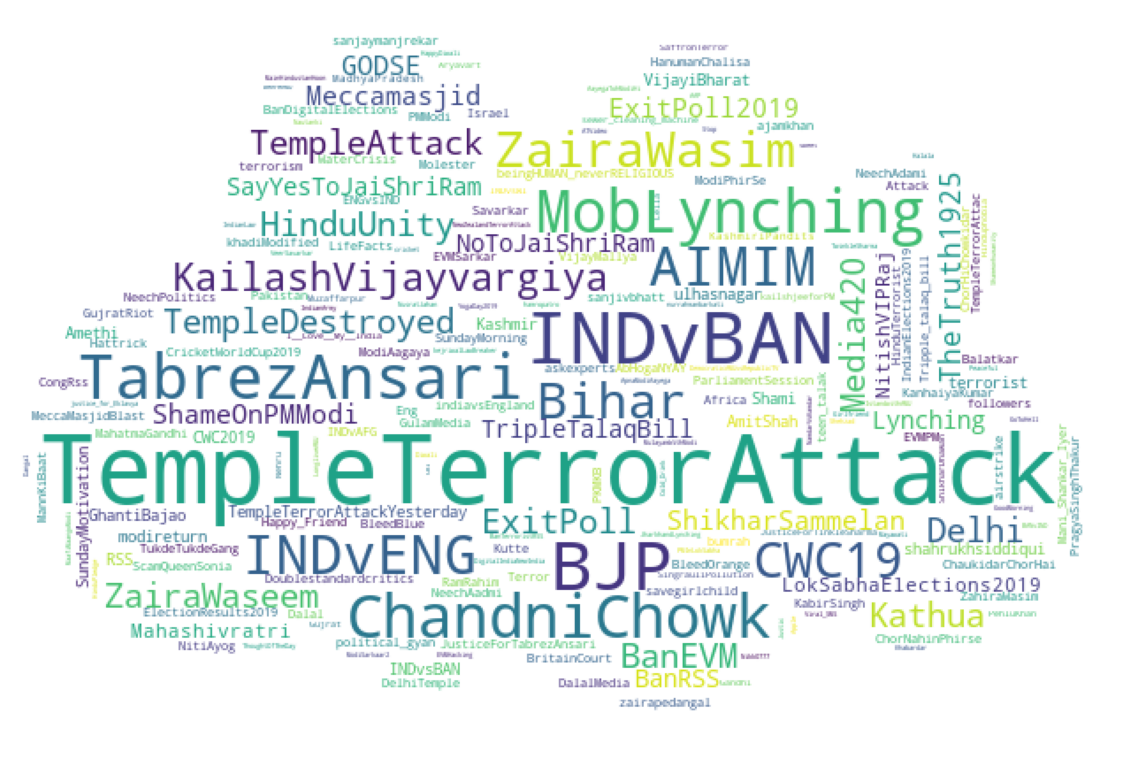

In [ ]:
cloud_mask = np.array(Image.open( "cloud.jpg"))

wc = WordCloud(background_color='white', max_font_size=80, mask=cloud_mask).generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
text = ''.join(tags['tags'])

No handles with labels found to put in legend.


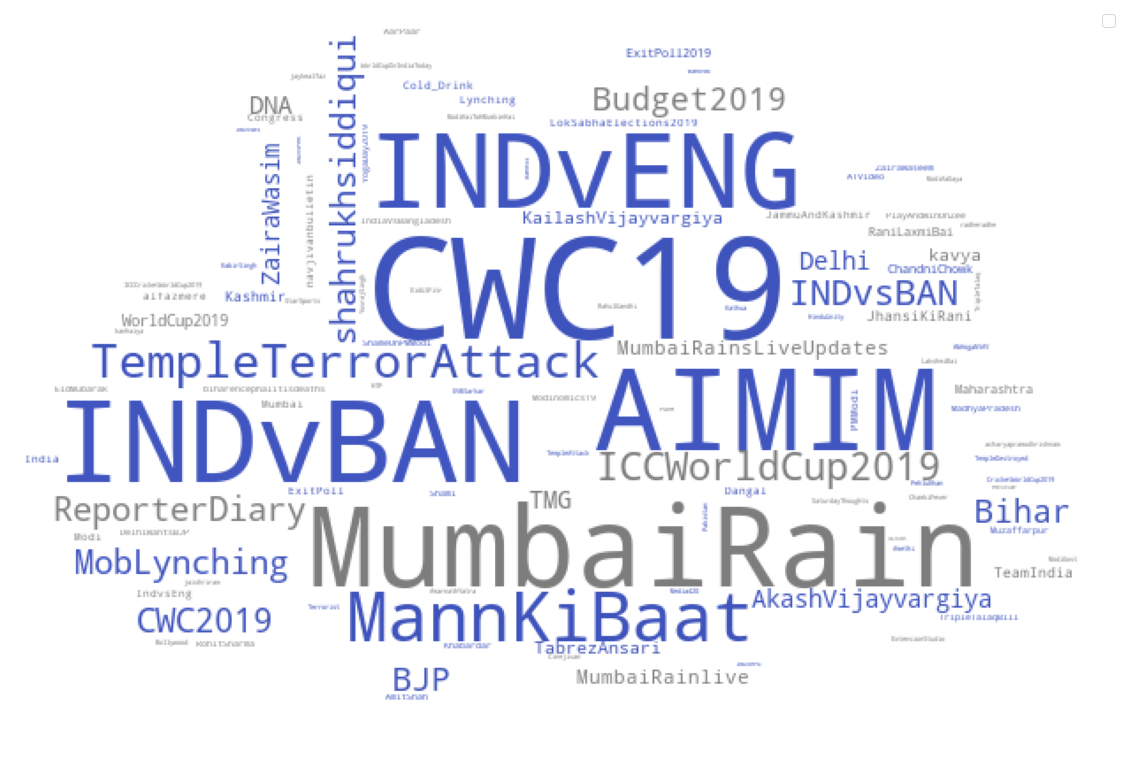

In [ ]:
cloud_mask = np.array(Image.open( "cloud.jpg"))
list_neg = list(neg_tags['tags'])

def get_color(word, font_size, position, orientation, random_state, font_path):
  # for i in range(0, len(tags)):
  word = '#'+word
  if word in list_neg:
    return("hsl(230,50%%, %d%%)" % np.random.randint(49,51))

  else:
    return("hsl(230,0%%, %d%%)" % np.random.randint(49,51))

wc = WordCloud(background_color='white', max_font_size=80, mask=cloud_mask, collocations=False).generate(text)
wc.recolor(color_func = get_color)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
def sentiment_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
pos_tags['sentiment_polarity'] = pos_tags['tags'].apply(sentiment_polarity)
pos_tags['sentiment_polarity'].sort_values(ascending=False)
pos_tags

,tags,flag,sentiment_polarity
0,#INDvBAN,NOT,0.0
1,#CWC19,NOT,0.0
2,#AkashVijayvargiya,NOT,0.0
3,#biharencephalitisdeaths,NOT,0.0
4,#shahrukhsiddiqui,NOT,0.0
...,...,...,...
1013,#friend,NOT,0.0
1014,#Trump,NOT,0.0
1015,#Modi,NOT,0.0
1016,#G20,NOT,0.0


In [ ]:
neg_tags['sentiment_polarity'] = neg_tags['tags'].apply(sentiment_polarity)
neg_tags.sort_values(by='sentiment_polarity', ascending=False)
neg_tags

,tags,flag,sentiment_polarity
0,#askexperts,HOF,0.0
1,#CWc19,HOF,0.0
2,#PKMKB,HOF,0.0
3,#ZahiraWasim,HOF,0.0
4,#PMModi,HOF,0.0
...,...,...,...
341,#WhoAreYou,HOF,0.0
342,#Bihar,HOF,0.0
343,#CEC,HOF,0.0
344,#Lynchistaan,HOF,0.0


In [ ]:
words = pd.DataFrame(['#happy', '#worst', '#nice', "#ugly", "okay", "WinterIsComing"])
words['sentiment_polarity'] = words[0].apply(sentiment_polarity)
words

,0,sentiment_polarity
0,#happy,0.8
1,#worst,-1.0
2,#nice,0.6
3,#ugly,-0.7
4,okay,0.5
5,WinterIsComing,0.0


In [ ]:
# !pip install emoji
# import emoji
# # reference: https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
# def extract_emojis(s):
#   return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [ ]:
# list = []
# for i in range(0, len(hindi_text)):
#   list.append(extract_emojis(hindi_text[i]))

In [ ]:
# print(list)

In [ ]:
import re 

def get_emojis(a_list):
    emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
    r = re.compile('|'.join(re.escape(p) for p in emojis_list))
    aux=[' '.join(r.findall(s)) for s in a_list]
    return(aux)

# list = []
# for i in range(0, len(hindi_text)):
#   list.append(get_emojis(hindi_text[i]))
# print(list)

In [ ]:
  # Ref: https://en.wikipedia.org/wiki/Unicode_block
  # Ref: https://en.wikipedia.org/wiki/Emoji#Unicode_blocks
PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )


emoticons = re.findall(PATTERN, '......🙄🤔 helloooooo :p')

emoticons

['🙄', '🤔']

In [ ]:
emojis = []
for i in range(0, len(df['text'])):
  emoticons = re.findall(PATTERN, df['text'][i])
  if emoticons != []:
    emojis.append(emoticons)
print(emojis)

[['❤', '❤', '❤'], ['✅', '✅', '✅', '✅', '✅', '✅']]


In [ ]:
emojis_labels=[]
for item in emojis:
  if len(item)!=0:
    emojis_labels.append(item)

In [ ]:
emojis_labels

[['❤', '❤', '❤'], ['✅', '✅', '✅', '✅', '✅', '✅']]